In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import FreqDist

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
df = pd.read_csv('processed_reviews.csv')
df = df[['id', 'listing_id','comments', 'latitude', 'longitude']]
df['comments'] = df['comments'].astype(str)

In [60]:
original_df = pd.read_csv('reviews.csv')
original_df = original_df[['id', 'comments']]
original_df['comments'] = original_df['comments'].astype(str)

In [61]:
df.head()

,id,listing_id,comments,latitude,longitude
0,30672,11551,flat bright comfortable clean adriano pleasant...,51.46225,-0.11732
1,32236,11551,week apartment great clean lot place close tub...,51.46225,-0.11732
2,41044,11551,host first morning dining table breakfast flat...,51.46225,-0.11732
3,48926,11551,wonderful stay valerio interesting interested ...,51.46225,-0.11732
4,63238,11551,great place wonderful host friendly respectful...,51.46225,-0.11732


In [62]:
from nltk.corpus import wordnet as wn

In [63]:
def lemmatization(word): # filter noun and adjective
    pos_w = set()   
    for w in wn.synsets(word):
        if w.name().split('.')[0] == word:
            pos_w.add(w.pos())
    return u'a' in pos_w or u's' in pos_w

def freq_words_adj(x):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    fdict = {k:v for k,v in fdist.most_common(3000) if lemmatization(k) == True}
    
    return fdict

In [64]:
def plot_freq(fdict, terms = 30):
    words_df = pd.DataFrame({'word':list(fdict.keys()), 'count':list(fdict.values())})
    d = words_df.nlargest(columns="count", n = terms)
    plt.figure(figsize=(30,10))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set_xticklabels(d['word'][:terms], rotation = -55, fontsize = 12)
    ax.xaxis.set_ticks_position('bottom')
    ax.set(ylabel = 'Count')
    plt.show()

In [65]:
comments = df['comments']

In [66]:
fdict = freq_words_adj(comments)

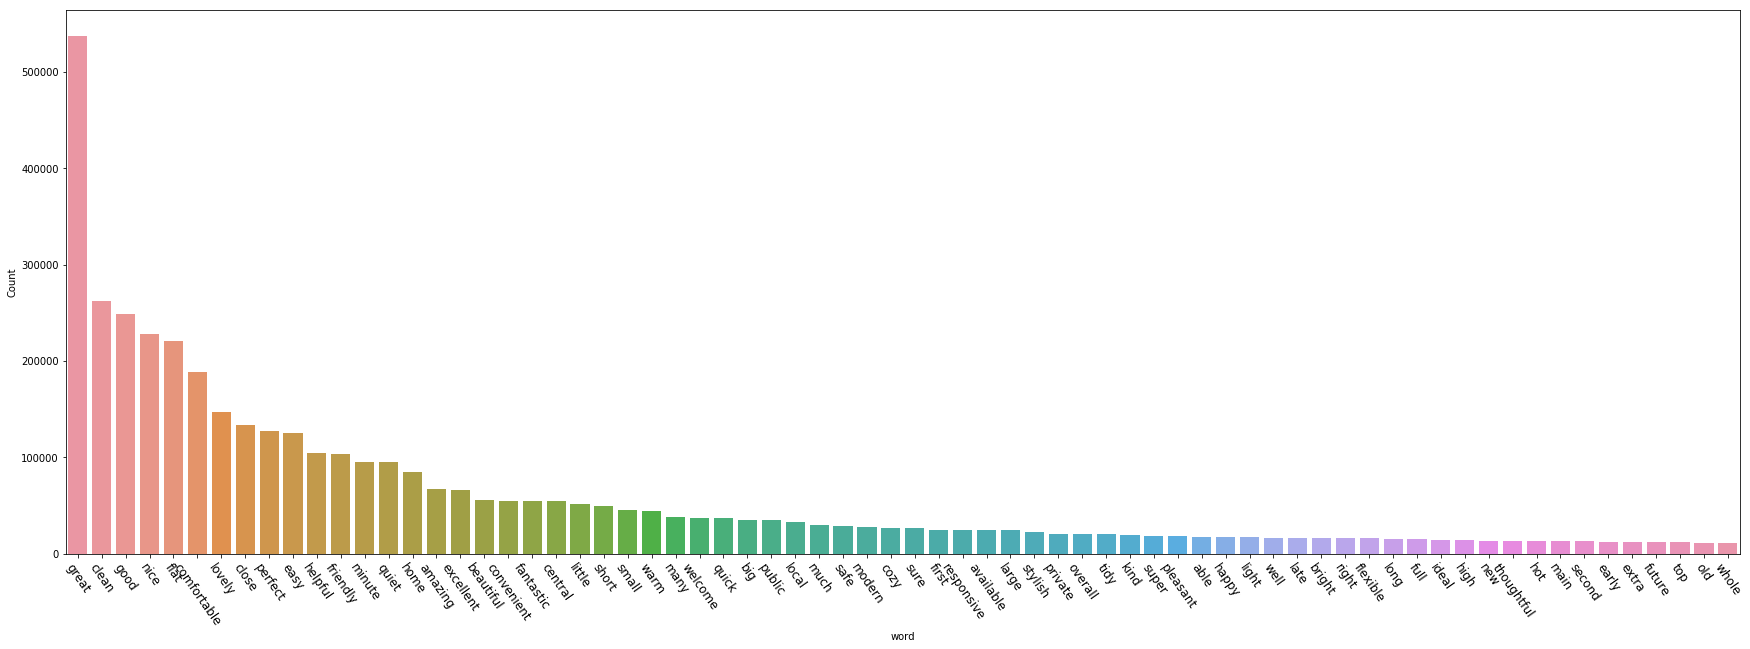

In [67]:
plot_freq(fdict, 70)

In [68]:
neatness = ['clean', 'nice', 'comfortable', 'modern', 'tidy', 'new', 'stylish']
location = ['quiet', 'beautiful', 'quick', 'safe', 'quickly', 'easy']
host = ['helpful', 'friendly', 'responsive', 'available', 'kind', 'pleasant', 'punctual']
overall = ['great', 'good', 'perfect', 'super', 'high', 'ideal', 'happy', 'amazing', 'excellent']

In [69]:
def find_similarities(words, min_acceptable_reputation=2):
    synonyms = set()
    antonyms = set()
    for word in words:
        for syn in wn.synsets(word):
            if '_' not in syn.name().split(".")[0]:
                synonyms.add(syn.name().split(".")[0])
            for lemma in syn.lemmas():
                if lemma.count() < min_acceptable_reputation:
                    continue
                if '_' not in lemma.name():
                    synonyms.add(lemma.name())
                if lemma.antonyms():
                    if '_' not in lemma.antonyms()[0].name() and lemma.antonyms()[0].name() != word and lemma.antonyms()[0].name() not in synonyms:
                        antonyms.add(lemma.antonyms()[0].name())
    return synonyms, antonyms        

In [70]:
neatness_syn, neatness_ant = find_similarities(neatness)
print(neatness_syn)
print(neatness_ant)

{'comfortable', 'prosperous', 'novel', 'uninfected', 'mod', 'decent', 'tidy', 'fresh', 'modern', 'new', 'respectable', 'advanced', 'fairly', 'kempt', 'raw', 'courteous', 'scavenge', 'nice', 'sporting', 'newfangled', 'fashionable', 'houseclean', 'blank', 'goodly', 'stylish', 'clean', 'newly', 'plumb', 'dainty', 'cleanse'}
{'nasty', 'dirty', 'nonmodern', 'unfashionable', 'uncomfortable', 'old'}


In [71]:
location_syn, location_ant = find_similarities(location)
print(location_syn)
print(location_ant)

{'comfortable', 'prosperous', 'serenity', 'immediate', 'quieten', 'condom', 'agile', 'rapidly', 'calm', 'speedily', 'beautiful', 'lull', 'promptly', 'hushed', 'slow', 'still', 'tranquillity', 'subdued', 'dependable', 'quiet', 'silence', 'quick', 'slowly', 'easily', 'repose', 'easy', 'flying', 'safe', 'quickly', 'quietly', 'cursorily', 'placid'}
{'unquietly', 'dangerous', 'slowly', 'noisy', 'agitate', 'unquiet', 'sound', 'ugly', 'difficult'}


In [72]:
host_syn, host_ant = find_similarities(host)
print(host_syn)
print(host_ant)

{'responsive', 'helpful', 'friendly', 'pleasant', 'kind', 'form', 'available', 'punctual', 'reactive', 'sort'}
{'unavailable', 'unhelpful', 'unpleasant', 'unfriendly', 'unkind'}


In [73]:
overall_syn, overall_ant = find_similarities(overall)
print(overall_syn)
print(overall_ant)

{'goodness', 'heights', 'high-pitched', 'commodity', 'perfective', 'happy', 'perplex', 'serious', 'arrant', 'estimable', 'amaze', 'exceedingly', 'superintendent', 'respectable', 'ace', 'puzzle', 'expert', 'beneficial', 'well', 'crack', 'skillful', 'astound', 'dependable', 'adept', 'great', 'gamey', 'super', 'eminent', 'big', 'gravid', 'felicitous', 'astonishing', 'effective', 'bewilder', 'amazing', 'extremely', 'utter', 'ideal', 'full', 'dear', 'thoroughly', 'good', 'bang-up', 'excellent', 'proficient', 'capital', 'glad', 'high', 'pure', 'perfect'}
{'imperfect', 'badness', 'low', 'unhappy', 'evil', 'ill', 'bad'}


In [74]:
labeled_rows = 50000
msk_size = (labeled_rows / df.count())[0]
msk_size

0.0455323644046188

In [75]:
msk = np.random.rand(len(df)) < msk_size

In [76]:
to_label_df = df[msk]
to_label_df.count()[0]

50013

In [77]:
to_label_df.head(10)

,id,listing_id,comments,latitude,longitude
56,1360759,11551,location apartment great close tube convenient...,51.46225,-0.11732
63,2373187,11551,adrian helpful host business trip perfect base...,51.46225,-0.11732
77,7677746,11551,sister day flat time little bit bus lot store ...,51.46225,-0.11732
88,13066313,11551,flat parent little base city great true pictur...,51.46225,-0.11732
157,192035,15400,little important look place great location nei...,51.48796,-0.16898
181,8967459,15400,wonderful location king flat spotless good int...,51.48796,-0.16898
324,106429540,25023,comfortable flat stay,51.44687,-0.21874
343,41216,25123,room comfy great host,51.57224,-0.20906
382,5056705,25123,nice nice room,51.57224,-0.20906
384,7186965,25123,great host thing helpful sure room spacious co...,51.57224,-0.20906


In [78]:
def make_score(pos_words, neg_words, min_score = 1):
    initial_score = 3 # with premeditation not start counting from half (4) but from point less
    min_score = 1
    max_score = 7
    
    if pos_words == 0 and neg_words == 0:
        return initial_score
    
    if neg_words > 0:
        return max(min_score, initial_score - neg_words)
    
    return min(max_score, initial_score + pos_words)

In [79]:
def create_rate(comment, label_synonyms, label_antonyms):
    pos_words = 0
    neg_words = 0
    words = comment.split()
    for word in words:
        if word in label_synonyms:
            pos_words +=1
            continue
        if word in label_antonyms:
            neg_words +=1
    return make_score(pos_words, neg_words)

In [80]:
labeled_df = to_label_df.copy()

In [81]:
labeled_df['neatness'] = labeled_df['comments'].apply(create_rate, args = (neatness_syn, neatness_ant,))
labeled_df['location'] = labeled_df['comments'].apply(create_rate, args = (location_syn, location_ant,))
labeled_df['host'] = labeled_df['comments'].apply(create_rate, args = (host_syn, host_ant,))
labeled_df['overall'] = labeled_df['comments'].apply(create_rate, args = (overall_syn, overall_ant,))

In [82]:
labeled_df.head(20)

,id,listing_id,comments,latitude,longitude,neatness,location,host,overall
56,1360759,11551,location apartment great close tube convenient...,51.46225,-0.11732,3,3,3,5
63,2373187,11551,adrian helpful host business trip perfect base...,51.46225,-0.11732,3,3,4,4
77,7677746,11551,sister day flat time little bit bus lot store ...,51.46225,-0.11732,3,3,3,3
88,13066313,11551,flat parent little base city great true pictur...,51.46225,-0.11732,3,3,3,6
157,192035,15400,little important look place great location nei...,51.48796,-0.16898,5,4,5,5
181,8967459,15400,wonderful location king flat spotless good int...,51.48796,-0.16898,3,3,3,6
324,106429540,25023,comfortable flat stay,51.44687,-0.21874,4,4,3,3
343,41216,25123,room comfy great host,51.57224,-0.20906,3,3,3,4
382,5056705,25123,nice nice room,51.57224,-0.20906,5,3,3,3
384,7186965,25123,great host thing helpful sure room spacious co...,51.57224,-0.20906,4,5,4,5


In [83]:
def show_labeled_results(column_name):
    print(labeled_df.groupby(column_name).count().reset_index()[[column_name, 'comments']])

In [84]:
show_labeled_results('neatness')
show_labeled_results('location')
show_labeled_results('host')
show_labeled_results('overall')

   neatness  comments
0         1        65
1         2       633
2         3     25935
3         4     15010
4         5      6279
5         6      1626
6         7       465
   location  comments
0         1        19
1         2       562
2         3     31524
3         4     13138
4         5      3669
5         6       886
6         7       215
   host  comments
0     2        25
1     3     38906
2     4      8994
3     5      1877
4     6       186
5     7        25
   overall  comments
0        1        13
1        2       306
2        3     16341
3        4     19527
4        5      9554
5        6      3055
6        7      1217


In [87]:
commented_df = pd.merge(labeled_df, original_df, left_on='id', right_on='id', how='left')
commented_df.drop(['id_y'], axis=1, inplace=True)

In [89]:
pd.set_option("display.max_colwidth", 350)
commented_df.head(25)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
0,1360759,11551,location apartment great close tube convenient neighborhood arrival relative bit surprised overall day great,51.46225,-0.11732,3,3,3,5,"The location of this apartment was great, we were very close to the tube which made it very convenient for getting around London. Adriano was very nice and welcoming and showed us around the neighborhood upon our arrival. We ended up staying with one of his relatives instead of Adriano, which we were a bit surprised by. Overall our 8 days in Br..."
1,2373187,11551,adrian helpful host business trip perfect base flat,51.46225,-0.11732,3,3,4,4,Adrian is a very nice and very helpful host. For my business trip to London I had a perfect base in his fab flat in Brixton.
2,7677746,11551,sister day flat time little bit bus lot store supermarket restaurant trip place,51.46225,-0.11732,3,3,3,3,"My two sisters and I stayed 4 days in Adriano's flat and we really loved it, Adriano was very kind and he took a time to explain us a little bit of Brixton, you can go anywhere from here by bus or underground it's really well connected with everything, there's a lot of stores, supermarkets, restaurants, etc. \r\nWe really enjoyed our trip and w..."
3,13066313,11551,flat parent little base city great true picture people self sufficient excellent alternative booking hotel room stone line location great next time family friend town,51.46225,-0.11732,3,3,3,6,I booked this flat for my parents while they were visiting London so they'd have their own little base for exploring the city. Adriano's flat was really great and true to the pictures on the listing. It had everything that two people needed to be self sufficient and was an excellent alternative to booking a hotel room. Being a stone's throw fro...
4,192035,15400,little important look place great location neighbor friendly place comfortable lot helpful information second night friend time valuable computer camera equipment jewelry arrival police thing room people obvious tourist lock police inadequate location simple tactic part instruction deliberate sure secure place correspondence email neighbor litt...,51.48796,-0.16898,5,4,5,5,"I am a little late reviewing this but it is important to me that I do. Look, the place is in a great location and the neighbor was very friendly. The place was perfectly comfortable and Philippa gave a lot of helpful information prior to our arrival in England.\r\n\r\nHowever, me and my girlfriend were robbed the second night we were there. ..."
5,8967459,15400,wonderful location king flat spotless good internet bed plenty hot water small kitchen good ground floor location elderly folk great host question,51.48796,-0.16898,3,3,3,6,"Wonderful location just off the Kings Rd. The flat was spotless, nicely decorated, good internet, comfy bed, plenty of hot water,small, but very well equipped kitchen. Good ground floor location so no need to lug luggage up stairs for us elderly folk. Philippa was a great host- answered all my questions promptly. Hope to stay there again."
6,106429540,25023,comfortable flat stay,51.44687,-0.21874,4,4,3,3,This a very comfortable flat and we enjoyed our stay.
7,41216,25123,room comfy great host,51.57224,-0.20906,3,3,3,4,Grace's house is so clean! It's probably the cleanest I have ever seen. The room is super comfy and rather roomy. She's a great host.\r\n\r\n\r\n
8,5056705,25123,nice nice room,51.57224,-0.20906,5,3,3,3,Nice place and nice room. Very recommend you to live.
9,7186965,25123,great host thing helpful sure room spacious comfortable location lot good restaurant easy transport,51.57224,-0.20906,4,5,4,5,Grace was a great host. Things ran smoothly and she was helpful in making sure everything was set up for me. The room was spacious and comfortable and the location is near lots of good restaurants and with easy transport to central London. I was glad to stay there and meet her!\r\n


In [91]:
commented_df[commented_df['location'] < 3].head(25)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
23,2096955,36299,garden beautiful great small kid easy access central little noisy due airplane train,51.47934,-0.28066,3,2,3,4,Lovely house. Very close to Kew Gardens which are beautiful and great for small kids. Very easy access into central London.\r\n\r\n Can get a little noisy due to the airplanes and trains but anywhere in Kew would have the same issue.
144,362400380,49970,nice clean room station line line head terminal question difficult day transport next,51.49527,-0.22938,5,2,3,3,"Nice and clean room, very close to the Underground station of Hammersmith (Picadilly line-line that heads to Heathrow terminals). Boris respond quickly to our questions as we visited London at a very difficult day with no means of transport (25th of Dec)!!! We will definitely choose him for our next visit to London!"
303,104315865,84223,room comfortable great view traffic noisy window open ear plug effect tasty breakfast,51.48656,-0.10654,4,2,3,4,Antonia was very welcoming and charming. The room was comfortable and had a great view over the gardens. Traffic was very noisy with the window open but ear plugs were effect in drowning it out. A tasty breakfast was provided.
377,272168968,90700,apartment great location lot place underground station store location big street late hour thin window noisy place owner well window flat wet water smell towel curtain dirty check simple host bag hour place enough night due amazing location,51.51074,-0.19853,2,2,3,7,"The apartment has great location near Nothing Hill and Kensington. You can easily reach lots of places by walk. The underground station is nearby, as well the grocery stores, bars, restaurants. The location resulted in big noise from the street till late hours, but also because of very thin windows (in that lively and noisy place the owner shou..."
532,8346010,145612,easy access public transport convenient location bit noisy due traffic,51.50549,-0.33443,3,2,3,3,Easy access to public transport and convenient location but a bit noisier due to traffic.
612,196245791,182802,single female area safe enough walk night dinner heather allow kitchen difficult,51.43756,-0.32159,3,2,3,3,I wouldn't recommend for a single female as the area doesn't feel safe enough to walk around at night after dinner. There is nowhere nearby to eat and Heather doesn't allow her kitchen to be used. I found this difficult
732,2462693,231854,place photo quite relief arrive review way dock sound system arrival music good location nice neighborhood,51.52080,-0.09950,4,2,3,4,"This place looks exactly as shown on the photos. That's quite a relief when you arrive ;-) But we could've expected it as the other reviews already confirmed this.\r\nI texted my way in. Simon answered really quick.\r\nI put my iPhone in the dock/sound system on arrival, put up some music, and we felt at home already.\r\nVery good location with..."
797,15335240,238711,fantastic time place lovely apartment great taste single detail nice home difficult imagine short regular basis nice friendly easy talk convenient arrangement super quick respond request thank,51.51022,-0.19395,5,2,4,5,"What a fantastic time we Had in Benjamin's place ! It is a Lovely apartment that has been really done with great taste ! Every single details were thought to make your stay as nice as if you were at home. It was really difficult to imagine that's it's being short let on a regular basis . And Ben ... : Nice, friendly, easy to talk to and conveni..."
814,8521769,244125,nice place comfortable setup pics thing note council housing dangerous,51.52830,-0.08035,5,2,3,3,"Nice place with a comfortable setup. Looks just like in the pics. One thing to note is that it seems to be a converted council housing flat and is surrounded by such. However, it wasn't dangerous at all."
828,450090758,244126,wonderful view flat artistic wrap lot space place friend time location amazing close great restaurant public 

In [92]:
commented_df[commented_df['host'] < 3].head(25)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
308,480759255,84223,fantastic catch tube lovely neighbourhood safe walk home night host helpful suggestion tip home apartment room clean photo kitchen unavailable short term guest,51.48656,-0.10654,4,4,2,3,Anotonia’s place was in a fantastic location in London! It was super easy to catch the tube. We found it was a lovely neighbourhood that was also safe to walk home to at night. Antonia was a kind host who offered helpful suggestions and tips about where to go. She encouraged us to feel at home in her apartment. The room was very clean and match...
1793,194653911,407303,not difficult place hold arrival constant contact room great stay location area issue weather cool window spider bathroom unpleasant surprise,51.54762,-0.08385,3,2,2,4,"She was not there for my stay and she was traveling. It was difficult to find her place and get a hold of her (before arrival she was in constant contact with me). Once there the house was nice and so was the room...very clean. Great stay for just sleeping and location in a ""hip"" area. the only issues is during my stay, the weather was cool so ..."
2389,48126505,507677,thrilled violeta place house unavailable hour choice disaster third time charm quiet little area easy access transportation route gated area wonderful host excited grateful comfortable bed medical issue trip bed firm violeta available question concern transport airport next visit plan city violeta place,51.52216,-0.21614,4,6,2,3,"We were initially thrilled to find Violeta's place after our house has suddenly become unavailable within hours of arriving in England and then after our back up choice became a disaster. Third time was a charm indeed! Very nice and quiet little area, super easy access to all transportation routes, secure gated area, and a wonderful host! I w..."
2598,49686399,543650,train arrival minute message hospitable work luggage storage necessary early unpleasant weather apartment plenty room bedroom bed couch great checking email computer wine excellent thank,51.51200,-0.13472,3,3,2,5,Dan kept in touch on the day of our train arrival into London. He responded within minutes to our AirBnB app messages. He and was very hospitable and offered to work with us if any luggage storage was necessary (ended up just heading to Gatwick early because of unpleasant weather). Three of us stayed in the apartment with plenty of room in bedr...
11115,477025971,4876828,unfriendly host,51.48901,-0.11818,3,3,2,3,Unfriendly host
11817,128059254,5335503,great location unhelpful host,51.52189,-0.09805,3,3,2,4,"Great location, unhelpful host."
13906,60134666,6785679,answer email day phone day unpleasant feeling flat realizing enter thank airbnb assistance house awesome comfortable little problem communication nice time,51.52949,-0.19860,5,4,2,3,"I had no answer to my emails few days before arriving and I couldn't join Nicole by phone the D-day, so that I've had a pretty unpleasant feeling when arriving at the flat and realizing that I couldn't enter in... Hopefully, thanks to AirBnB assistance, everything was resolved few minutes after that.\r\nThe house is really awesome, comfortable,..."
15317,204053161,7772930,good quiet location bed comfortable whole flat clean bathroom bit tired stay unpleasant cooking smell kitchen common area,51.52765,-0.13012,5,5,2,4,"Good quiet location. Beds were comfortable and the whole flat reasonably clean. Bathroom and kitchen are a bit tired, and for our stay there was an unpleasant cooking smell in the kitchen and common areas."
16557,61091334,8635998,lovely flat unfriendly great area impossible parking area host need help thing wrong facility,51.53250,-0.17677,3,3,2,4,"Lovely flat (if somewhat user unfriendly), great area, impossible parking (but that's the area). Host needs to provide more help when things go wrong and more facilities. If that's sorted out would certainly use again."
23348,149865515,13907937,clean

In [93]:
commented_df[commented_df['overall'] < 3].head(25)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
220,104407096,65638,first experience bad news future,51.48624,-0.09624,3,3,3,2,We recently stayed at Mike's place in London. This was my first experience with Airbnb. The good news: Mike thought of everything. The bad news: he has spoiled me for all future Airbnb stays
247,117327801,74107,house nice nice quiet neighborhood bad thing light bathroom house full dust thing perfect place,51.54144,-0.20784,5,4,3,2,"The house was nice, big and located in a really nice and quiet neighborhood. Typical english house, I really enjoyed it. But there were some bad things. The light of the bathroom was broken and the house was full of dust. I think that if these things would be solved this will be a perfect place. Anyway, I recommend this house for London."
430,484219902,100326,room spacious host nice bad night place,51.56485,-0.05612,4,3,3,2,The room is very clean and spacious. Hosts are both very nice and caring:) Too bad i only stayed for one night at their place!
616,1812662,183019,friendly kind host bad cold arrival tea medication young child friend host guest special experience breakfast morning comfortable bed chloe place traveler special experience,51.48687,-0.09989,4,4,5,2,We had a very pleasant stay at Kathryn's house! Kathryn and Louise were very friendly and kind hosts. I had a very bad cold upon arrival and Kathryn made me teas and gave me the medication that I needed. Our young children thoroughly enjoyed making friends with the hosts and other guests - it was a special experience for them! They felt com...
666,14172087,214995,bad place tha last yrs,51.51876,-0.20705,3,3,3,2,It was one of the worst places where I have stayed in tha last 20yrs
753,17452644,234776,flat comfortable kindness host bad conversation hope day agradable easy access part,51.49039,-0.19595,4,5,3,2,I had a very great journey in Adam's home. Because of the flat which is very comfortable and above all because of the kindness of my host. Even if my english is very bad I liked the conversation we had and I hope Adam would be my guest in the Reunion island one day to know him better. The neibourghood is very agradable in Kensington and the pro...
1140,52522675,329109,good point great flat nice comfortable great transport link stunning pub minute quiet location bad point considerate window flat third level lift slippery step wet positive stay,51.50451,-0.29203,5,5,3,2,"Good points, Kiran was great, flat is nice and comfortable, great transport links and a stunning pub minutes away. Quiet location. Bad points, Kiran smokes (although she is a very considerate smoker and smokes out the window) and the flat is on the third level with no lift and slippery steps when wet. Positive stay all the same."
1675,166950660,391808,moment great suggestion place thing amenity hotel dryer iron shampoo towel overall great people shower tiny story flat prepared pregnant woman bad husband luggage area cute accessible,51.49226,-0.14042,3,3,3,2,"Michael and Roberto were extremely accommodating from the moment we arrived. They had great suggestions for places to eat and things to do, they had all of the amenities a hotel would have--hair dryer, iron, shampoo, towels, etc--and were overall just great people to meet! The shower is tiny, but it's London :) There is no lift to get up to the..."
1751,317659955,397262,wonderful host sure watch bad movie house nice garden full plant neighbourhood quiet take bus,51.45255,-0.05013,4,4,3,2,Mr NADORI is a wonderful host. He always wants to make sure that you have everything you need!\nHowever he made me watch a really bad movie... ;-)\nThe House is really nice with a garden full of plants !\nThe neighbourhood is really quiet and well placed to take the bus.
1984,451280754,437574,bad weather sinead beautiful smile charming personality house amazing clean morning table full delicious breakfast place,51.56493,-0.13403,4,4,3,2,When I arrived in London I was welcom